# Titanic: Machine Learning from Disaster

O Titanic Challenge é considerado, por muitos, o *Hello World* da ciência de dados. O desafio serve para os iniciantes se familiarizarem com o funcionamento das competições de machine learning pela plataforma Kaggle, conhecida como a rede social de data science e machine learning. Nesse [Link](https://www.kaggle.com/c/titanic/overview) é possível ter acesso a maiores detalhes do desafio.

O projeto foi estruturado da seguinte forma:

1.   **Apresentação sobre o Titanic**
2.   **Definição do problema/objetivo**
3.   **Data Extract**
4.   **Data Wrangling**
5.   **Exploratory Data Analysis**
6.   **Data Wrangling (Parte 2)** (edit: Tratamento importante para melhorar as futuras predições. Incluído posteriormente.)
7.   **Definição Modelos**
8.   **Avaliação**
9.   **Aplicação Modelo**


## 1. Apresentação sobre o Titanic

O Titanic foi um navio da classe de transatlânticos lançado em maio de 1911. Na época, foi considerado o navio mais luxuoso e seguro já construído, acarrentando em um fama de "Inafundável". 

Todavia, em abril de 1912, afundou após uma colisão com um iceberg. Seu naufrágio resultou na mortes de aproximadamente 1.500 pessoas. 

[Fonte](https://pt.wikipedia.org/wiki/RMS_Titanic)

![Titanic](https://aventurasnahistoria.uol.com.br/media/_versions/legacy/2018/04/11/titanic2-0349859403-2203948..capa_widelg.jpg)

## 2. Definição do problema/objetivo

Quem nunca escutou a celébre frase:"Mulheres e crianças primeiro!". A frase está escrita na maioria dos protocolos de evacuação do mundo, no titanic não foi diferente. 

Eventualmente, é notório que algumas pessoas pertinentes a tais grupos tiveram maior probabilidade de sobreviência. 

O desafio consiste em construir um modelo que consiga **Classificar** com maior assertividade possível se determinado passageiro conseguiria sobreviver ao naufrágio do Titanic.



 


## 3. Data Extract

Os datasets necessários para criação do modelo, treinamento e teste podem ser acessados por esse [link](https://www.kaggle.com/c/titanic/data).

Para esse projeto, foram realizados os downloads dos datasets e copiados para uma pasta do Google Drive. 

No notebook, foi montada uma instância do Google Drive que será utilizada para extrair os dados diretamente da pasta criada do projeto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importando a lib pandas e instânciando os datasets de treino e teste.
import pandas as pd

In [ ]:
data_test = pd.read_csv('/content/drive/My Drive/titanic-challenge/datasets/test.csv')

In [ ]:
data_train = pd.read_csv('/content/drive/My Drive/titanic-challenge/datasets/train.csv')

In [ ]:
# dataset para treino 
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# dataset para teste
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


As features com seus respectivos significados, segundo a [documentação](https://www.kaggle.com/c/titanic/data), são:


**Survived** - Feature booleana que identifica se o indivíduo morreu ou sobreviveu ao acidente. Variável target.

**Pclass**	- Classe em que o passageiro foi alocado no navio.

**Sex** -	Sexo	

**Age** - Idade

**sibsp**	- Identifica as relações familiares do passageiro em grau de irmão, irmã, meio-irmão, meia-irmão, marido e esposa.	

**Parch** -	Identifica as relações familiares do passageiro em grau de mãe, pai, filho, filha, enteado, enteada. Se alguma criança viaja com a babá, será considerada = 0.

**Ticket**	- Número do ticket/bilhte.	

**Fare** - 	Tarifa de passageiro.	

**Cabin** - Número da cabine.

**Embarked** -	Porto de embarcação.

**Name** - Nome do passageiro.

**PassengerId** - Id do passageiro.

## 4. Data Wrangling


Antes de realizarmos uma análise exploratória e aplicações dos modelos, é necessário que realizemos algumas operações de limpeza e transformação dos datasets. Para isso, será criado algumas funções que irão suportar esses processos.


Iremos verificar se existem dados missing(faltantes) em nosso dataset.

In [ ]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Podemos observar que a feature Age(Idade), Embarked(Ponto de Embarque) e Fare possuem valores missing (feature **Cabin** não irá fazer parte do modelo). Portanto, para que os algoritmos de Machine Learning utilizados performem de maneira relevante, iremos inputar um valor para esses itens. 



Para a feature Age, iremos considerar a mediana dos valores contidos, para que não haja influência de *outliers*.

In [ ]:
def median_age(dataset):

  MedianAge = dataset['Age'].median(skipna = True)
  dataset['Age'].fillna(MedianAge, inplace = True)

  return dataset

Para a feature Embarked, utilizaremos a moda da feature, isto é, iremos considerar o valor que apresenta maior frequência. 

In [ ]:
def mode_embarked(dataset):

  ModeEmbarked = dataset['Embarked'].mode()

  # Para que possamos preencher os valores nulos da feature Embarked é necessário converter o tipo de retorno de Pandas.Series para str. Logo, temos:
  ModeEmbarkedValue =  max(ModeEmbarked)

  dataset['Embarked'].fillna(ModeEmbarkedValue, inplace = True)

  return dataset

In [ ]:
def median_fare(dataset):
    
    MedianFare = dataset['Fare'].median(skipna = True)
    dataset['Fare'].fillna(MedianFare, inplace = True)

    return dataset

In [ ]:
#aplicando as funções de limpeza de dados

train_df = median_age(data_train)
train_df = mode_embarked(train_df)

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


É possível verificar que as features **Sex** e **Embarked** são do tipo categórico. Para utilização de alguns algoritmos preditivos é necessário que ambas se tornem numéricas. Logo, utilizaremos  as transformações baseados no conjunto *LabelEncoder* e o método da lib pandas *GetDummies*.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Categorização númerica da feature Sex

def codify_sex(dataset):

  """
    Função que realiza o processo de feature engineering com a variável Sex

    dataset: dataframe que possui a coluna Sex.
  """
  
  # instanciando as classes
  labelencoder = LabelEncoder()   

  # aplicando a categorização númerica
  dataset['SexCode'] = labelencoder.fit_transform(dataset['Sex'])
  
  return dataset 

In [ ]:
# Processo de feature engineering com o atributo Embarked

def codify_embarked(dataset):
  """
    Função que realiza o processo de feature engineering com a variável Embarked

    dataset: dataframe que possui a coluna Embarked.
  """
  df_embarked = pd.get_dummies(dataset.Embarked, prefix='Embarked')

  new_dataset = dataset.join(df_embarked)

  return new_dataset

In [ ]:
 def drop_columns(dataset):
  """
    Função para excluir colunas que não geram valor para a análise e modelo.

    dataset: dataframe em que será excluídos as colunas.
  """
  
  new_dataset = dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis = 1)
  return new_dataset

In [ ]:
# aplicando as funções 
train_df = codify_sex(data_train)

In [ ]:
train_df = codify_embarked(train_df)

In [ ]:
train_df = drop_columns(train_df)

## 5. Exploratory Data Analysis


A etapa subsequente a Limpeza dos dados é a análise exploratória, onde nós iremos responder perguntas que irão nos ajudar a entender a base de dados em questão.

**Disclaimer:** Feature SexCode = Female -> 0 e Male -> 1

In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np 

%matplotlib inline 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#### 5.1 Metadados e Dados Estatísticos da amostra.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   SexCode     891 non-null    int64  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [ ]:
# O dataset apresenta 891 instâncias e 9 features

train_df.shape

(891, 10)

In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,SexCode,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


A amostra possui 891 passageiros, qual o percentual de sobreviventes ?

Além disso, podemos observar que a amostra possui 75% (3º quartil) de seus dados com passageiros de idades abaixo ou igual a 35 anos. 

Essa informação nos permite criar a seguinte hipótese: Será que o maior número de sobreviventes/mortos estão contidos nessa faixa etária ?

#### 5.2 Na amostra em análise, qual o percentual de sobreviventes ?

In [ ]:
# quantidade de sobreviventes
survived = len(train_df.query('Survived == 1'))

In [ ]:
# percentual de sobreviventes no dataset

perc = (survived/ len(train_df)) * 100

print(f'O percentual de sobreviventes no dataset de treino {perc:.2f}%')

O percentual de sobreviventes no dataset de treino 38.38%


#### 5.3 Qual a faixa etária das grupo de pessoas que mais sobreviveram ? E que mais vieram a falecer ? 

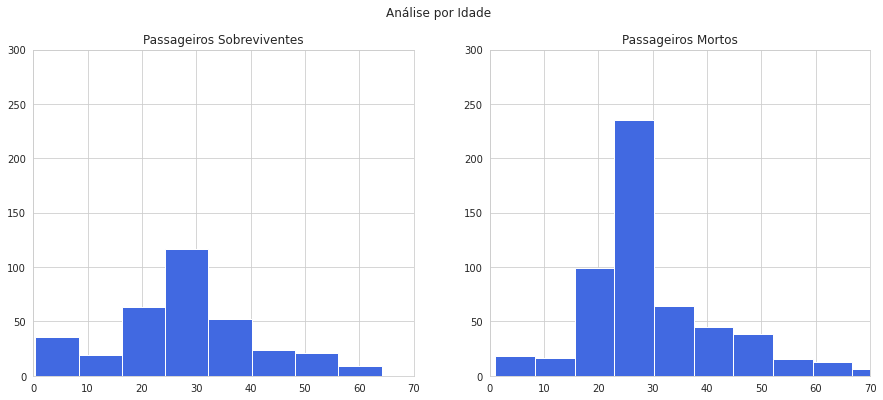

In [ ]:
sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.set_title('Passageiros Sobreviventes')
ax1.hist(train_df.query("Survived == 1")['Age'], color='royalblue')
ax1.set(xlim = (0, 70), ylim =(0, 300)) 

ax2.set_title('Passageiros Mortos')
ax2.hist(train_df.query("Survived == 0")['Age'], color= 'royalblue')
ax2.set(xlim = (0, 70), ylim =(0, 300)) 

fig.suptitle('Análise por Idade')

plt.show()

O gráfico acima nos permite observar que:

- Existe um desbalanceamento de dados no dataset em relação à variável alvo (**Survived**).

- Há concentração dos dados na faixa entre 20 a 35 anos tanto para sobreviventes quanto para mortos.



#### 5.4 Existem features altamente correlacionadas ? 

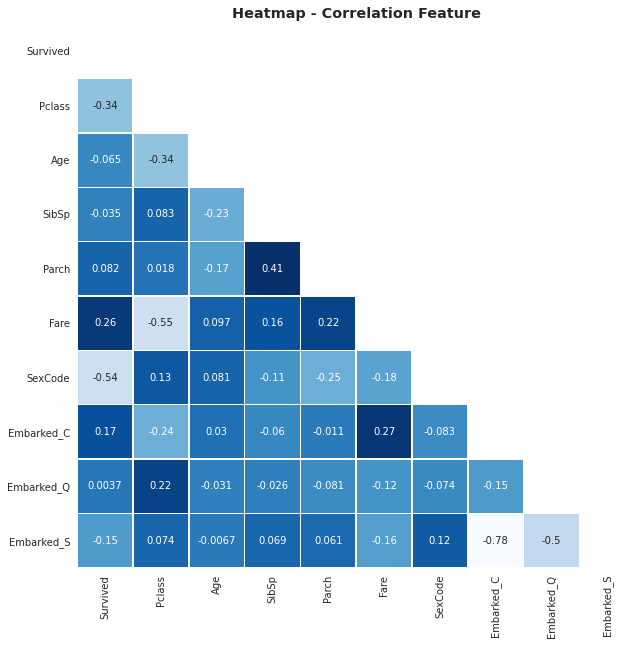

In [ ]:
corr = train_df.corr()

mask = np.zeros_like(train_df.corr())

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    plt.figure(figsize=(10, 10))
    
    plt.title('Heatmap - Correlation Feature',
               {'fontsize': 'x-large',
              'fontweight' : 'bold'})
    
    ax = sns.heatmap(corr, 
                     mask=mask, 
                     vmax=.3,  
                     cmap='Blues',
                     cbar=False, 
                     annot=True, 
                     linewidths=.5)
    plt.show()

A correlação de pearson, método aplicado acima, apresenta seus resultados em um intervalo de [-1, 1], oriundos do cálculo da covariância pelos desvios padrões da amostra.

A determinação da correlação entre as features é necessária para verificação do nível de colinearidade entre elas. Altas correlações implicam em muticolinearidades, ou seja, features independentes apresentam relação lineares idênticas ou fortemente idênticas forçam o modelo a caminhar para uma direção equivocada.

Podemos observar que as featues **Embarked_C** e **Embarked_S** apresentam uma forte correlação, logo, ambas serão excluídas para não sofrermos problema de ajuste do modelo. 

In [ ]:
def drop_embarked(dataset):

  new_dataset = dataset.drop(['Embarked_C', 'Embarked_S'], axis= 1)

  return new_dataset

In [ ]:
train_df = drop_embarked(train_df)

#### 5.5 Podemos dizer que os passageiros da 1ª classe foram os mais que sobreviveram ? Qual classe teve o maior número de não sobreviventes ? O sexo apresenta alguma relevância ?


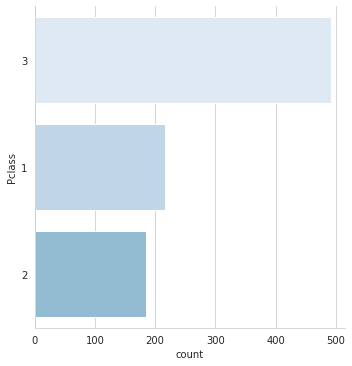

In [ ]:
 # Quantitade de passageiros por Classe

 sns.catplot(y= 'Pclass',
            kind= 'count',
            data=train_df,
            palette=sns.color_palette("Blues"),
            legend = True,
            order = [3, 1, 2]
            )

plt.show()

A 3ª Classe é que possui maior númmero de passageiros. 

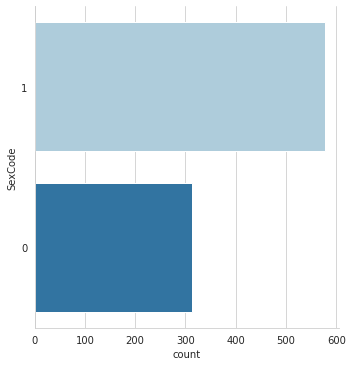

In [ ]:
 # Quantidade de passageiros por Sexo 
 
 sns.catplot(y= 'SexCode',
            kind= 'count',
            data=train_df,
            palette=sns.color_palette("Paired"),
            legend = True,
            order = [1, 0]
            )

plt.show()

O navio apresenta mais passageiros do sexo masculino do que feninino.

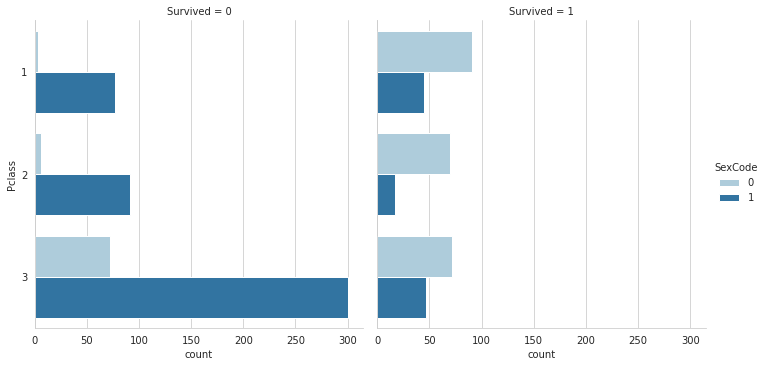

In [ ]:
 # Diferença de sobreviventes por classe e sexo.
 
 sns.catplot(y= 'Pclass',
            kind= 'count',
            data=train_df,
            hue = 'SexCode',
            col = 'Survived',
            palette=sns.color_palette("Paired"),
            legend = True
            )

plt.show()

Pontos a serem destacados:

- A 3ª classe apresenta o maior número de passageiros que não sobreviveram.
- A 1ª classe apresenta o maior número de passageiros que sobreviveram.

Essa informação consegue evidenciar bastante a diferença social presente na época. 

Além disso, vemos que em todas as classes, as mulheres tiveram prioridades na evacuação, acarretando em um número maior de sobreviventes em relação aos passageiros masculinos.

#### 5.6 A tarifa de embarque apresenta relação com a sobrevivência ou sobrevivência ? 

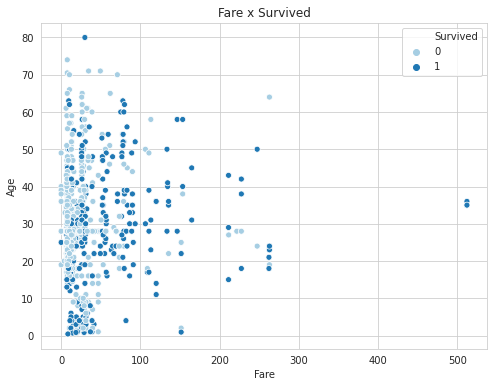

In [ ]:
plt.figure(figsize=(8,6))

plt.title('Fare x Survived')

sns.scatterplot(x='Fare', 
                y= 'Age',
                hue= 'Survived', 
                data= train_df,
                palette="Paired"
                )

plt.show()

É notório que existem um número maior de sobreviventes com tarifas de embarque(**Fare**) mais altas. 

In [ ]:
df_class_fare = train_df[['Pclass', 'Fare']]

In [ ]:
df_class_fare.groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
df_class_fare.groupby('Pclass').median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


Além disso, podemos confirmar que os passageiros que pagaram maiores tarifas são da classe que apresenta maiores sobreviventes. 

## 6. Data Wrangling (Parte 2)


#### 6.1 Resample e Split training data 

Observamos que existe um desbalanceamento dos dados em relação a variável alvo *Survived*.


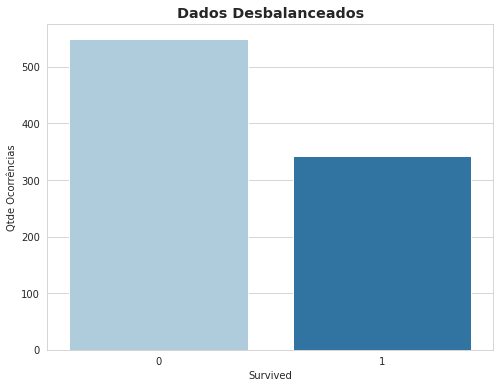

In [ ]:
plt.figure(figsize=(8, 6))

plt.title('Dados Desbalanceados',
          {'fontsize': 'x-large',
           'fontweight' : 'bold'})

sns.countplot(x = 'Survived', 
              data= train_df, 
              palette=sns.color_palette("Paired"))

plt.ylabel('Qtde Ocorrências')

plt.show()

Modelos baseados em dados desbalanceados em relação a variável *target*, apresentam outputs com  um *bias* elevado, acarretando em previsões errôneas. 

Logo, para podermos aplicar um modelo preditivo, iremos aplicar o método de balanceamento de dados **Under-sampling**. 

O *Under-sampling* irá selecionar um subconjunto aleatório da variável alvo com maior ocorrência. Em um *trade-off*, o modelo terá ganho de performance devido a diminuição de dados em execução, porém ocorrerá perda de informação dos dados excluídos, podendo ocasionar em predições inferiores. 

Antes de realizarmos o processo de *resample*, iremos separar a variável target das demais. Logo, temos:

In [ ]:
X = train_df.drop(columns='Survived')
y = train_df['Survived']

Será instânciada a classe *resample* e aplicado nos dados de treinamento.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

res = RandomUnderSampler()
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
X_, y_ = res.fit_resample(X, y)

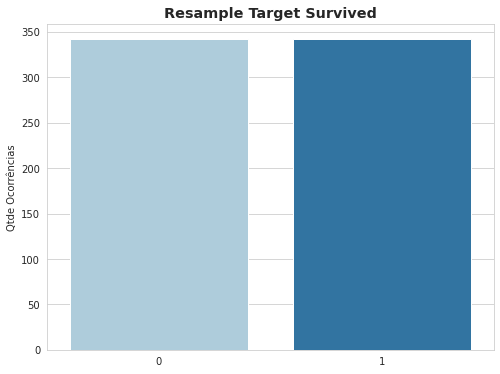

In [ ]:
# verificando o resample

plt.figure(figsize=(8, 6))

plt.title('Resample Target Survived',
          {'fontsize': 'x-large',
           'fontweight': 'bold'})

sns.countplot(y_,
              palette=sns.color_palette("Paired"))

plt.ylabel('Qtde Ocorrências')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.35, random_state = 42)

In [ ]:
print(f'X treino: {X_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y treino: {y_train.shape}')
print(f'y test: {y_test.shape}')


X treino: (444, 7)
X test: (240, 7)
y treino: (444,)
y test: (240,)


## 7. Definição Modelos

O desafio em questão pode ser definido como o problema de classificação e aprendizado supervisionado, isto é, baseado nos datasets disponibilizados e transformados, iremos criar modelos que tentarão prevê se os passageiros irão sobreviver ou não ao naufrágio do Titanic.

Serão aplicados os algoritmos *Logistic Regression* e *Random Forest*.

#### 7.1 Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelReg = LogisticRegression()

In [ ]:
modelReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_reg = modelReg.predict(X_test)

#### 7.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelRand = RandomForestClassifier(criterion='entropy',
                                  max_depth= 200,
                                  max_leaf_nodes = 10,
                                  n_estimators= 200,
                                  random_state=42)

In [ ]:
modelRand.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=200, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_rand = modelRand.predict(X_test)

## 8. Avaliação Modelos

Para avaliação dos modelos, utilizaremos as métricas: Matriz de confusão, acurácia, curva RO e curva ROC x AUC.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
# Logistic Regression

acuracia_reg = accuracy_score(y_test, y_reg)

roc_auc_reg = roc_auc_score(y_test, y_reg)

# Random Forest

acuracia_rand = accuracy_score(y_test, y_rand)

roc_auc_rand = roc_auc_score(y_test, y_rand)

In [ ]:
print(f'Acurácia Logistic Regression: {acuracia_reg:.4f}.')
print(f'Acurácia Random Forest: {acuracia_rand:.4f}.')

Acurácia Logistic Regression: 0.7667.
Acurácia Random Forest: 0.7792.


In [ ]:
print(f'Curve AUC x ROC Logistic Regression:{roc_auc_reg:.4f}.')
print(f'Curve AUC x ROC Random Forest:{roc_auc_rand:.4f}.')

Curve AUC x ROC Logistic Regression:0.7701.
Curve AUC x ROC Random Forest:0.7838.


In [ ]:
print('************ Report Classification - Logistic Regression ************')
print(f'\n {classification_report(y_test, y_reg)}')

************ Report Classification - Logistic Regression ************

               precision    recall  f1-score   support

           0       0.82      0.73      0.77       131
           1       0.72      0.81      0.76       109

    accuracy                           0.77       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.77      0.77      0.77       240



In [ ]:
print('************ Report Classification - Random Forest ************')
print(f'\n {classification_report(y_test, y_rand)}')

************ Report Classification - Random Forest ************

               precision    recall  f1-score   support

           0       0.84      0.73      0.78       131
           1       0.72      0.83      0.77       109

    accuracy                           0.78       240
   macro avg       0.78      0.78      0.78       240
weighted avg       0.79      0.78      0.78       240



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Confusion Matrix - Logistic Regression

matrix_reg = confusion_matrix(y_test,
                              y_reg
                              )


perc_reg = matrix_reg / np.sum(matrix_reg)

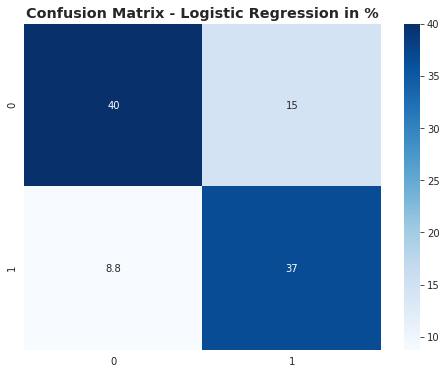

In [ ]:
plt.figure(figsize=(8, 6))

plt.title('Confusion Matrix - Logistic Regression in %',
          {'fontsize': 'x-large',
           'fontweight': 'bold'})

sns.heatmap(perc_reg * 100,
            cmap = 'Blues',
            annot = True)

plt.show()

In [ ]:
# Confusion Matrix - Random Forest

matrix_rand = confusion_matrix(y_test,
                              y_rand
                              )


perc_rand = matrix_rand / np.sum(matrix_rand)

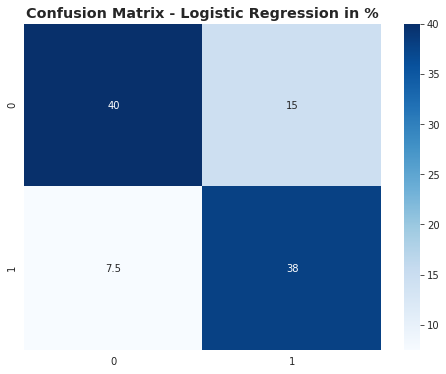

In [ ]:
plt.figure(figsize=(8, 6))

plt.title('Confusion Matrix - Logistic Regression in %',
          {'fontsize': 'x-large',
           'fontweight': 'bold'})

sns.heatmap(perc_rand * 100,
            cmap = 'Blues',
            annot = True)

plt.show()

O modelo *Random Forest* apresentou maior acurácia, maior curva ROC e melhores resultados de precisão e *recall* em relacão a capacidade de previsibilidade de sobreviventes.

## 8. Aplicação Modelo

Para aplicar o modelo escolhido, iremos aplicar algumas funções criadas anteriormente para tratamento de algumas features.

In [ ]:
# tratando idades nulas

new_data = median_age(data_test)

In [ ]:
# tratando taxas nulas

new_data = median_fare(new_data)

In [ ]:
# transformando feature sex em número

new_data = codify_sex(new_data)

In [ ]:
# transformando feature embarked em númerico e feature enginnering com criação de novas features

new_data = codify_embarked(new_data)

In [ ]:
# drop em colunas não essenciais

new_data = drop_columns(new_data)

In [ ]:
# drop colunas embarked por multicolinearidade

new_data = drop_embarked(new_data)

In [ ]:
new_data.head()

,Pclass,Age,SibSp,Parch,Fare,SexCode,Embarked_Q
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,0
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,0
4,3,22.0,1,1,12.2875,0,0


In [ ]:
# Aplicando modelo nos dados de produção

y_new = modelRand.predict(new_data)

In [ ]:
# O retorno do modelo é um array. Será necessário transformar em Series para concatenar com o dataset/dataframe de produção.

y_series = pd.Series(y_new)

In [ ]:
y_series

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [ ]:
# criando dataset com dados da previsão

predict_dataset = pd.concat([data_test, y_series], axis= 1)

In [ ]:
predict_dataset.rename(columns= {0: 'Survived'}, inplace= True)

In [ ]:
predict_dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'SexCode', 'Survived'],
      dtype='object')

In [ ]:
# criando dataset para submissão no kaggle.

gender_submission = predict_dataset[['PassengerId', 'Survived']]

In [ ]:
gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


In [ ]:
gender_submission.to_csv('/content/drive/My Drive/titanic-challenge/datasets/gender_submission.csv', index= False)